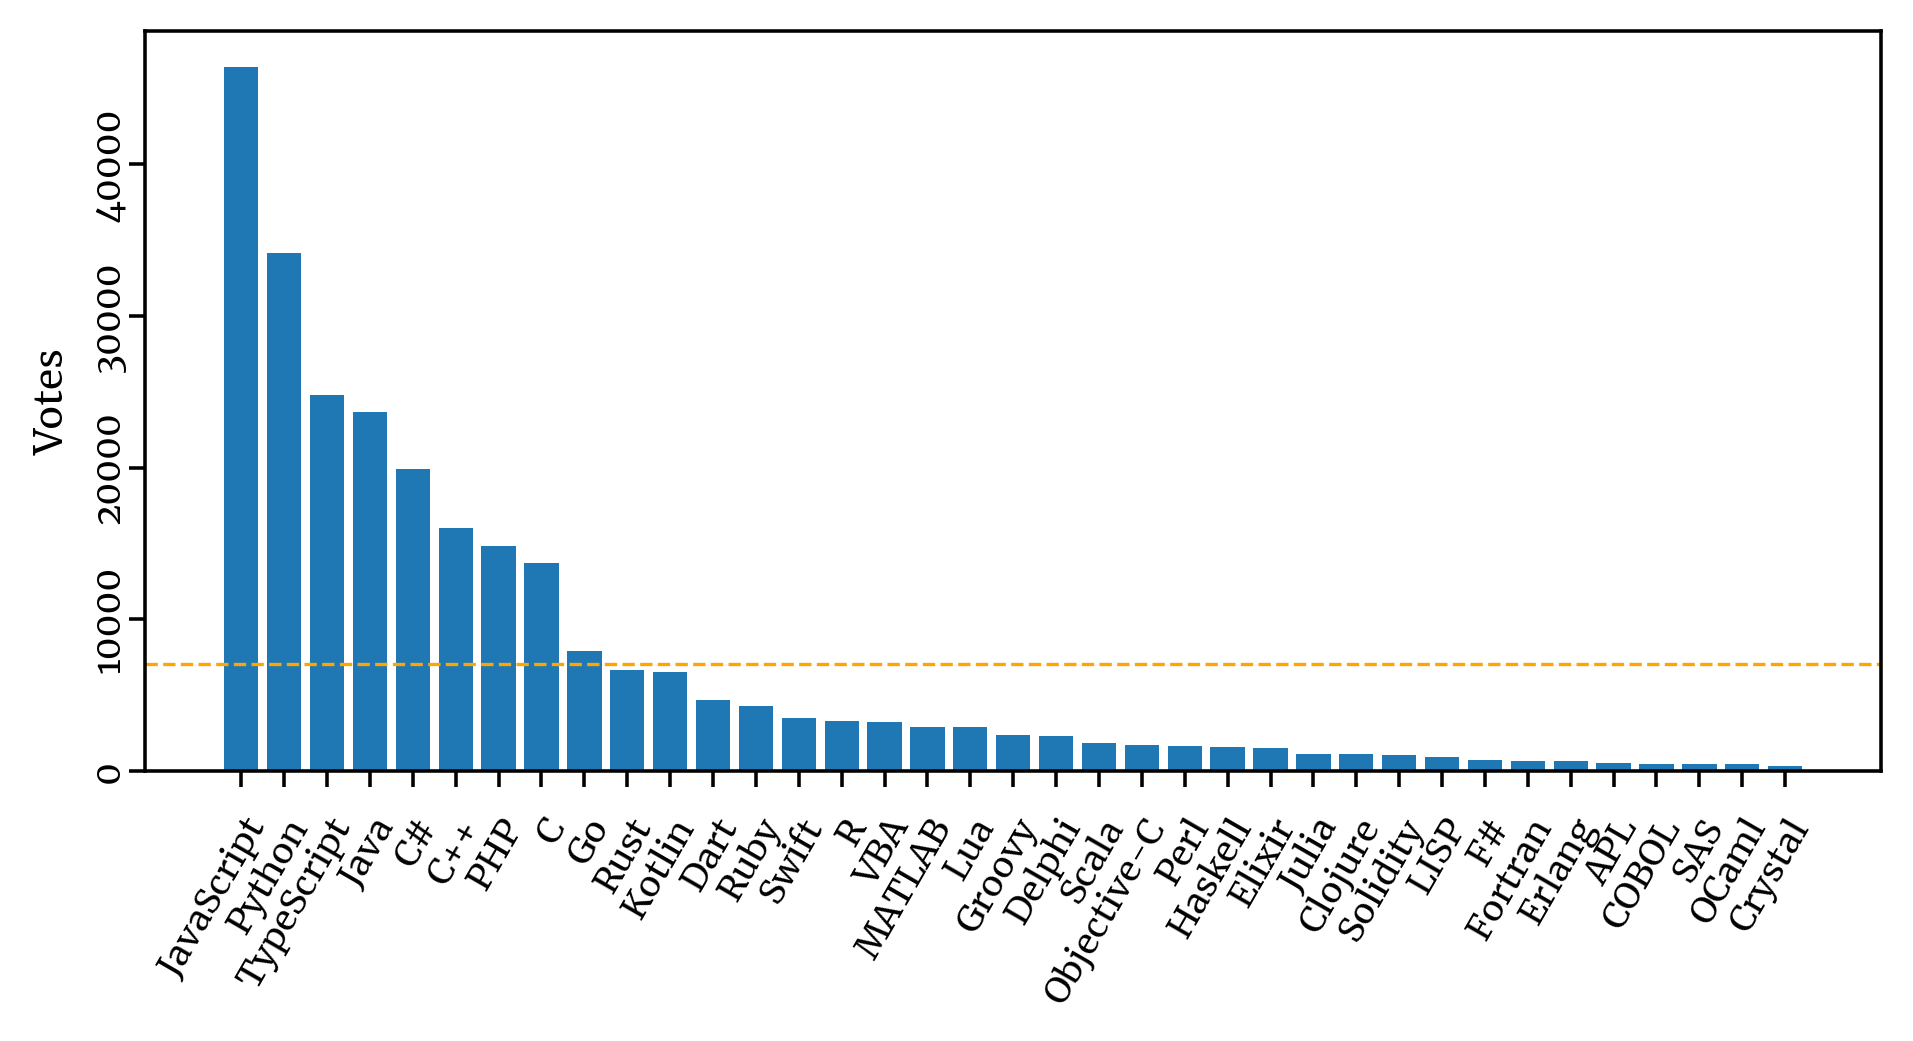

In [20]:
#| echo: false
#| label: fig-so-survey
#| fig-cap: "Popularity of programming languages in 2022"

%config InlineBackend.figure_formats = ["png"]

import json, re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc


def read_jsonc(filepath: str):
  with open(filepath, "r", encoding="utf-8") as f:
      text = f.read()
  re_text = re.sub(r"\/\/.*", "", text)
  json_obj = json.loads(re_text)
  return json_obj

# print(plt.style.available)
# fast, seaborn-v0_8, seaborn-v0_8-dark, seaborn-v0_8-darkgrid, seaborn-v0_8-deep, seaborn-v0_8-muted, seaborn-v0_8-notebook, seaborn-v0_8-paper
plt.style.use("seaborn-v0_8-paper")
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
rc('font', **{
	'family': 'serif',
	'serif': 'Merriweather',
	# 'size': 22
})

data = read_jsonc("../data/stackoverflow-survey-2022.jsonc")
group_data = list([float(x[1].replace(",", "")) for x in data.values()])
group_names = list(data.keys())
group_mean = np.mean(group_data)

fig, ax = plt.subplots(figsize=(7, 3), dpi=320)
# ax.patch.set_alpha(0)
# fig.patch.set_alpha(0)

ax.axhline(group_mean, ls="dashed", color="orange", linewidth=0.75)

ax.bar(group_names, group_data)
plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=90, ha="center", rotation_mode="anchor")
ax.set(ylabel="Votes")
plt.show()